In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load idx2class csv file and load it into a dictionary
idx2class_csv = '/mnt/disks/large/data/labels.csv'
df = pd.read_csv(idx2class_csv)

idx2class = {}
for i in range(len(df)):
    idx2class[df.iloc[i,0]] = df.iloc[i,1]
print(idx2class)

{0: 'culture::abruzzi', 1: 'culture::achaemenid', 2: 'culture::aegean', 3: 'culture::afghan', 4: 'culture::after british', 5: 'culture::after german', 6: 'culture::after german original', 7: 'culture::after italian', 8: 'culture::after russian original', 9: 'culture::akkadian', 10: 'culture::alexandria-hadra', 11: 'culture::algerian', 12: 'culture::alsace', 13: 'culture::american', 14: 'culture::american or european', 15: 'culture::amsterdam', 16: 'culture::ansbach', 17: 'culture::antwerp', 18: 'culture::apulian', 19: 'culture::arabian', 20: 'culture::aragon', 21: 'culture::arica', 22: 'culture::asia minor', 23: 'culture::assyrian', 24: 'culture::atlantic watershed', 25: 'culture::attic', 26: 'culture::augsburg', 27: 'culture::augsburg decoration', 28: 'culture::augsburg original', 29: 'culture::austrian', 30: 'culture::avignon', 31: 'culture::avon', 32: 'culture::aztec', 33: 'culture::babylonian', 34: 'culture::babylonian or kassite', 35: 'culture::bactria-margiana archaeological comp

# Best Model

In [103]:
results_dir = '/mnt/disks/large/output/cnnrnn_final/test/test-08/test_prediction.csv'

# Get predicted labels
df = pd.read_csv(results_dir)
pred_str = df.iloc[:,1].tolist()
ids = df.iloc[:,0].tolist()
pred_labels = np.zeros((len(df), 1103))

for i in range(len(df)):
    curr_labels = pred_str[i].split(' ')
    for lab in curr_labels:
        pred_labels[i,int(lab)] = 1

In [104]:
## Get true labels
#test_label_file = '/mnt/disks/large/data/train_split/train_split_val.csv'
test_label_file = '/mnt/disks/large/data/train_split/train_split_test.csv'
label_df = pd.read_csv(test_label_file)
orig_label_str = label_df.iloc[:,1].tolist()
orig_labels = np.zeros((len(label_df), 1103))

for i in range(len(label_df)):
    curr_gt = orig_label_str[i].split(' ')
    for lab in curr_gt:
        orig_labels[i,int(lab)] = 1

In [105]:
from sklearn.metrics import fbeta_score, f1_score
f2_samples = np.zeros((len(df)))
f1_samples = np.zeros((len(df)))
for i in range(len(df)):
    f2_samples[i] = fbeta_score(orig_labels[i,:], pred_labels[i,:], 2)
    f1_samples[i] = f1_score(orig_labels[i,:], pred_labels[i,:])

In [106]:
print(f2_samples)

[0.38461538 0.18518519 0.68181818 ... 0.3125     0.22727273 0.5       ]


In [108]:
idx_max = np.argmax(f2_samples)
print(idx_max)
indices_f2 = [n for n,f2 in enumerate(f2_samples) if f2 > 0.8]
print(indices_f2)
indices_f1 = [n for n,f1 in enumerate(f1_samples) if f1 > 0.7]
print(indices_f1)
f1_max = np.argmax(f1_samples)
print(f1_max)

3555
[690, 1091, 1305, 1808, 1971, 2090, 2285, 2475, 2859, 3130, 3210, 3555, 4176, 4512, 4729, 4878, 5416, 5652, 5674, 5956, 6772, 6813, 6996, 7011, 7726, 8292, 8639, 8664, 8779, 9021, 9185, 9264, 9481, 9843, 10026, 10114, 10247, 10803]
[2859, 3555, 4729, 4878, 6813, 7011, 8292]
3555


In [109]:
# Function to plot original image and predicted labels
import os
from PIL import Image
import skimage
import matplotlib.cm as cm

def visualize_pred(img_path, pred_labels, true_labels, idx2class):
    image = Image.open(img_path)

    pred_labels_list = np.argwhere(pred_labels == 1.0).reshape(-1).tolist()
    true_labels_list = np.argwhere(true_labels == 1.0).reshape(-1).tolist()
    
    if len(pred_labels_list) > len(true_labels_list):
        pred_labels_list_1 = pred_labels_list[:len(true_labels_list)]
        pred_labels_list_2 = pred_labels_list[len(true_labels_list):]
    else:
        pred_labels_list_1 = pred_labels_list
        pred_labels_list_2 = []
    
    pred_labels_str_1 = ''
    pred_labels_str_2 = ''
    true_labels_str = ''
    for idx, pred in enumerate(pred_labels_list_1):
        if idx == 0:
            pred_labels_str_1 = pred_labels_str_1 + idx2class[pred]
        else:
            pred_labels_str_1 = pred_labels_str_1 + '\n' + idx2class[pred]
    for idx, pred in enumerate(pred_labels_list_2):
        if idx == 0:
            pred_labels_str_2 = pred_labels_str_2 + idx2class[pred]
        else:
            pred_labels_str_2 = pred_labels_str_2 + '\n' + idx2class[pred]
    for idx, gt in enumerate(true_labels_list):
        if idx == 0:
            true_labels_str = true_labels_str + idx2class[gt]
        else:
            true_labels_str = true_labels_str + '\n' + idx2class[gt]
        
    
    plt.imshow(image)
    print(image.size)
    #print('Predicted: {}'.format(pred_labels_str))
    #print('Ground truth: {}'.format(true_labels_str))
    plt.text(-30, -20, '%s' % (true_labels_str), color='black', backgroundcolor='white', fontsize=12)
    plt.text(170, -20, '%s' % (pred_labels_str_1), color='blue', backgroundcolor='white', fontsize=12)
    plt.text(350, -20, '%s' % (pred_labels_str_2), color='blue', backgroundcolor='white', fontsize=12)

    plt.axis('off')
    plt.show()


In [110]:
test_img_dir = '/mnt/disks/large/data/train_split/test'
#test_img_dir = '/mnt/disks/large/data/train_split/val'

(392, 300)


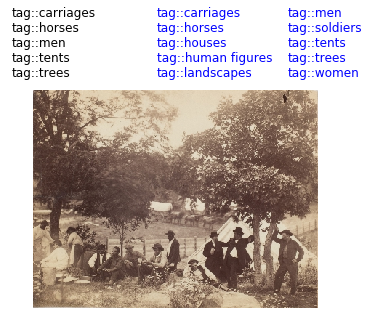

F1 score: 0.6666666666666666
F2 score: 0.8333333333333334


In [144]:
# Perfect prediction
idx = 3210
#idx = 10803
img_path = os.path.join(test_img_dir, ids[idx] + '.png')

# plot
pred_lab = pred_labels[idx,:]
true_lab = orig_labels[idx,:]
visualize_pred(img_path, pred_lab, true_lab, idx2class)

print('F1 score: {}'.format(f1_samples[idx]))
print('F2 score: {}'.format(f2_samples[idx]))

(433, 300)


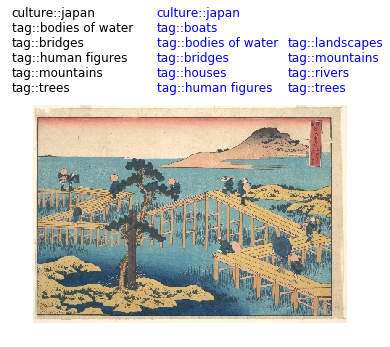

F1 score: 0.7499999999999999
F2 score: 0.8823529411764706


In [120]:
# Perfect prediction
idx = 2859
img_path = os.path.join(test_img_dir, ids[idx] + '.png')

# plot
pred_lab = pred_labels[idx,:]
true_lab = orig_labels[idx,:]
visualize_pred(img_path, pred_lab, true_lab, idx2class)

print('F1 score: {}'.format(f1_samples[idx]))
print('F2 score: {}'.format(f2_samples[idx]))

# Best Model vs Baseline Model

In [79]:
best_dir = '/mnt/disks/large/output/cnnrnn_final/test/test-01/dev_prediction.csv'

# Get predicted labels
df_dev = pd.read_csv(best_dir)
dev_pred_str = df_dev.iloc[:,1].tolist()
ids = df_dev.iloc[:,0].tolist()
dev_pred_labels = np.zeros((len(df_dev), 1103))

for i in range(len(df_dev)):
    curr_str = str(dev_pred_str[i])
    if curr_str == 'nan':
        curr_labels = ''
    else:
        curr_labels = curr_str.split(' ')
 
    for lab in curr_labels:
        dev_pred_labels[i,int(lab)] = 1

In [80]:
bs_dir = '/mnt/disks/large/output/baseline_final/test/test-01/dev_prediction.csv'

# Get predicted labels
df_bs = pd.read_csv(bs_dir)
bs_pred_str = df_bs.iloc[:,1].tolist()
ids = df_bs.iloc[:,0].tolist()
bs_pred_labels = np.zeros((len(df_bs), 1103))

for i in range(len(df_bs)):
    curr_str = str(bs_pred_str[i])
    if curr_str == 'nan':
        curr_labels = ''
    else:
        curr_labels = curr_str.split(' ')
 
    for lab in curr_labels:
        bs_pred_labels[i,int(lab)] = 1

In [81]:
## Get true labels
dev_label_file = '/mnt/disks/large/data/train_split/train_split_val.csv'
label_df = pd.read_csv(dev_label_file)
orig_label_str = label_df.iloc[:,1].tolist()
orig_labels = np.zeros((len(label_df), 1103))

for i in range(len(label_df)):
    curr_gt = orig_label_str[i].split(' ')
    for lab in curr_gt:
        orig_labels[i,int(lab)] = 1

In [82]:
f2_samples = np.zeros((len(df_dev)))
f1_samples = np.zeros((len(df_dev)))
for i in range(len(df_dev)):
    f2_samples[i] = fbeta_score(orig_labels[i,:], dev_pred_labels[i,:], 2)
    f1_samples[i] = f1_score(orig_labels[i,:], dev_pred_labels[i,:])

In [93]:
idx_max = np.argmax(f2_samples)
print(idx_max)
indices_f2 = [n for n,f2 in enumerate(f2_samples) if f2 > 0.8]
print(indices_f2)
indices_f1 = [n for n,f1 in enumerate(f1_samples) if f1 > 0.7]
print(indices_f1)
f1_max = np.argmax(f1_samples)
print(f1_max)

820
[246, 276, 361, 573, 798, 820, 928, 1493, 1578, 1581, 1658, 2172, 2241, 2619, 2664, 2815, 3198, 3678, 4034, 4379, 4592, 4780, 4824, 4856, 5241, 5556, 5793, 5816, 6030, 6355, 6696, 7181, 7367, 7547, 7872, 8623, 8771, 9183, 9270, 9408, 9957]
[573, 820, 1527, 4896, 7181, 9408]
1527


Prediction from best model...
(300, 378)


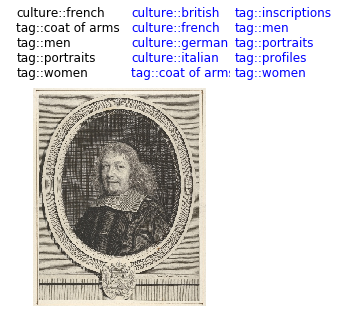

F1 score: 0.6666666666666666
F2 score: 0.8333333333333334


In [102]:
dev_img_dir = '/mnt/disks/large/data/train_split/val'


idx = 1493
img_path = os.path.join(dev_img_dir, ids[idx] + '.png')

# plot
print('Prediction from best model...')
dev_pred_lab = dev_pred_labels[idx,:]
true_lab = orig_labels[idx,:]
visualize_pred(img_path, dev_pred_lab, true_lab, idx2class)

print('F1 score: {}'.format(f1_samples[idx]))
print('F2 score: {}'.format(f2_samples[idx]))

Prediction from baseline model...
(300, 379)


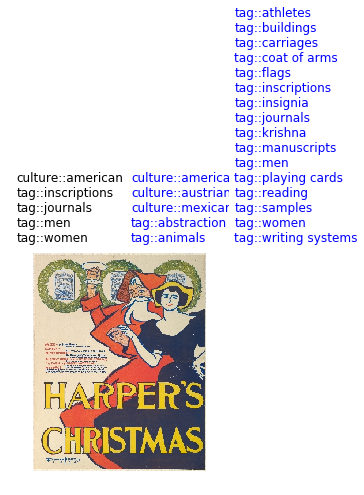

In [89]:
# plot
print('Prediction from baseline model...')
bs_pred_lab = bs_pred_labels[idx,:]
true_lab = orig_labels[idx,:]
visualize_pred(img_path, bs_pred_lab, true_lab, idx2class)